In [17]:
from smpl.smpl_torch import test_smpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import numpy as np

In [21]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

pose_size = 72
beta_size = 10

np.random.seed(9608)
pose = torch.from_numpy((np.random.rand(32, pose_size) - 0.5) * 0.4)\
    .type(torch.float64).to(device)
betas = torch.from_numpy((np.random.rand(32, beta_size) - 0.5) * 0.06) \
        .type(torch.float64).to(device)


In [25]:
# trans 控制根节点位置进而控制整个body的空间位置
trans = torch.from_numpy(np.zeros((32, 3))).type(torch.float64).to(device)

mesh, joint = test_smpl(device,pose,betas,trans)

 Tensor J_regressor shape:  torch.Size([24, 6890])
 Tensor joint_regressor shape:  torch.Size([24, 6890])
 Tensor weights shape:  torch.Size([6890, 24])
 Tensor posedirs shape:  torch.Size([6890, 3, 207])
 Tensor v_template shape:  torch.Size([6890, 3])
 Tensor shapedirs shape:  torch.Size([6890, 3, 10])
mesh: torch.Size([32, 6890, 3])
joint: torch.Size([32, 24, 3])
time cost: 0.05535769462585449


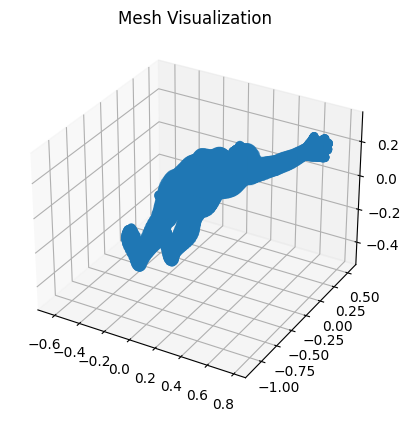

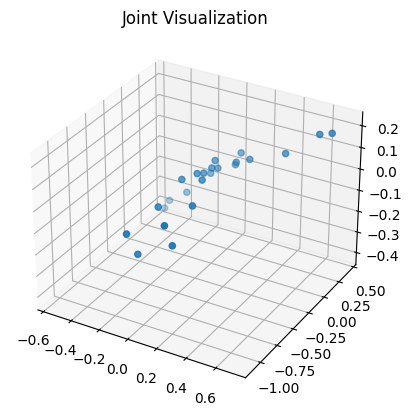

In [26]:

# 假设您有一个批次的mesh和joint
batch_idx = 0  # 选择要显示的批次索引

# 可视化mesh
mesh_data = mesh[batch_idx].cpu().numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mesh_data[:, 0], mesh_data[:, 1], mesh_data[:, 2])
ax.set_title('Mesh Visualization')
plt.show()

# 可视化joint
joint_data = joint[batch_idx].cpu().numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(joint_data[:, 0], joint_data[:, 1], joint_data[:, 2])
ax.set_title('Joint Visualization')
plt.show()
